## Problem Statement
---

Parkinson’s disease (PD) is one of the major public health diseases in the world which is progressively increasing day by day and had its effect on many countries. Thus, it is very important to predict it at an early age which has been a challenging task among researchers because the symptoms of disease come into existence in either middle or late middle age. So this project focuses on using various machine learning techniques such as Logistic Regression, Random Forest, SVM, Decision Tree and KNeighbors algorithms. The prediction efficiency would be beneficial for patients who are suffering from Parkinson. Generally in the first stage, Parkinson can be cured by the proper treatment. So it‘s important to identify the PD at the early stage for the betterment of the patients. The main purpose of this work is to find the best prediction model.

In [90]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score # Accuarcy
from sklearn.metrics import confusion_matrix # Confusion Matrix
from sklearn.metrics import precision_score # Precision
from sklearn.metrics import recall_score # Recall
from sklearn.metrics import f1_score # Weighted F1 Score
from sklearn.metrics import classification_report # Classification Report

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Reading the dataset
df = pd.read_csv('parkinsons.data')

In [3]:
# Loading the dataset
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


## Data Exploration
---

In [5]:
df.shape
# The dataset has 195 rows and 24 columns

(195, 24)

In [7]:
df.isnull().sum()
# There are no null values in the dataframe

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
# Show the data types of columns
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [12]:
# Displaying the column names of the dataframe
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [13]:
# The describe() method is used for calculating some statistical data of the numerical values of the Series or DataFrame
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [14]:
# Target column of prediction
# status - Health status of the subject (one) - Parkinson's, (zero) - healthy
df['status'] 

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

## Data Visualizaion 
---

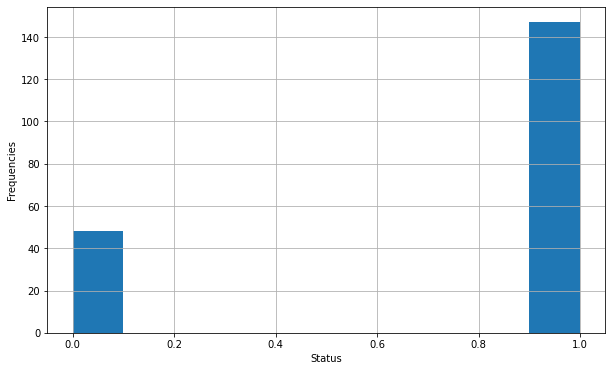

In [18]:
plt.figure(figsize=(10, 6))
df.status.hist()
plt.xlabel('Status')
plt.ylabel('Frequencies')
plt.plot();
# The dataset has high number of patients effected with Parkinson's disease.

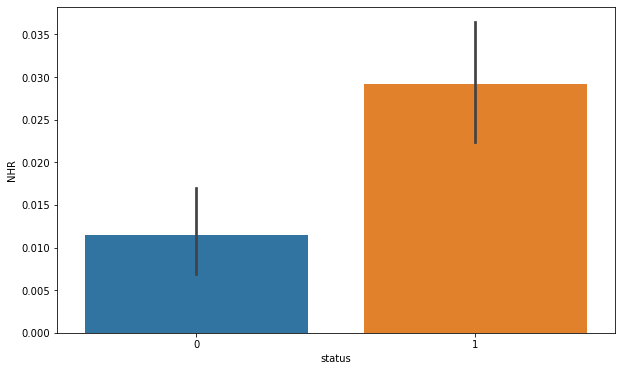

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='NHR', data=df);

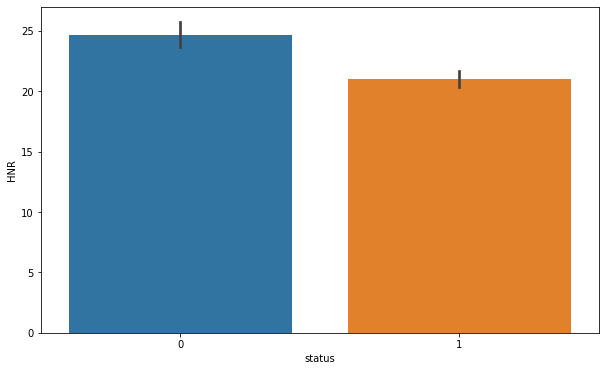

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='HNR', data=df);

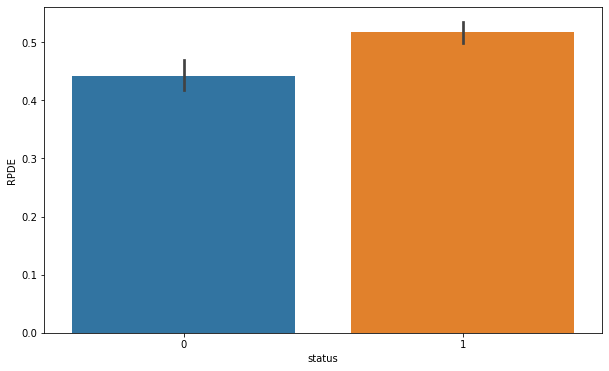

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='RPDE',data=df);

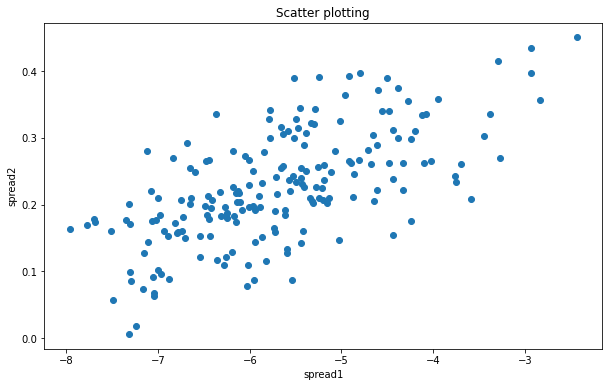

In [84]:
# Scatter plot
# plot spread1 , spread2
# set x , y labels
plt.figure(figsize=(10, 6))
plt.scatter(df.spread1, df.spread2)
plt.xlabel('spread1')
plt.ylabel('spread2');
plt.title('Scatter plotting');

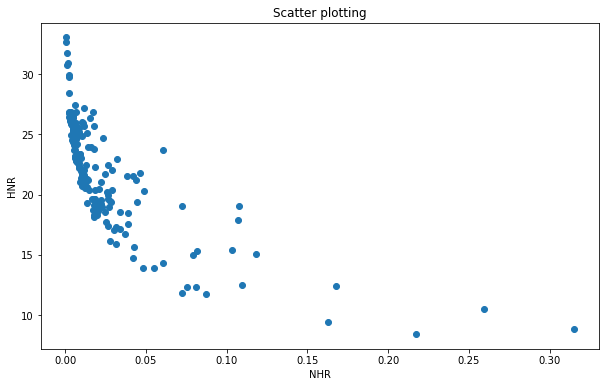

In [85]:
# Scatter plot
# plot NHR , HNR
# set x , y labels
plt.figure(figsize=(10, 6))
plt.scatter(df.NHR, df.HNR)
plt.xlabel('NHR')
plt.ylabel('HNR');
plt.title('Scatter plotting');

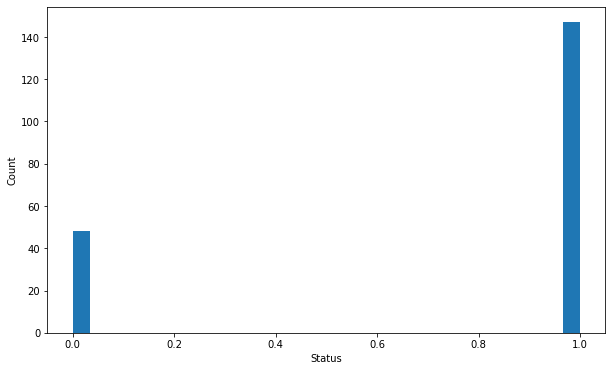

In [88]:
# Histogram
# plot status 
# set x label
plt.figure(figsize=(10, 6))
plt.hist(df.status, bins=30)
plt.xlabel('Status')
plt.ylabel('Count');

In [ ]:
# Removing  name column for machine learning algorithms
df.drop(['name'],axis=1,inplace=True)

In [32]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [33]:
# Spitting the dataset into x and y
X = df.drop(labels=['status'],axis=1)
y = df['status']

In [34]:
# Displaying X head of 2
X.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [36]:
# Displaying y head of 2 
y.head(2)

0    1
1    1
Name: status, dtype: int64

In [37]:
# Check X type , shape
type(X), X.shape

(pandas.core.frame.DataFrame, (195, 22))

In [38]:
# Check y type,
type(y), y.shape

(pandas.core.series.Series, (195,))

## Data Splitting
---

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=40)

In [44]:
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X train shape: (156, 22)
X test shape: (39, 22)
y train shape: (156,)
y test shape: (39,)


## Machine learning

### Logistic Regression Model
---

In [46]:
# Instantiate the estimator
log_reg = LogisticRegression()

In [47]:
# Fit the estimator (train the model)
log_reg.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
# Predict on train 
train_pred = log_reg.predict(X_train)

# Accuracy on train
print('Model accuracy on train is: ', accuracy_score(y_train, train_pred))

# Predict on test
test_pred = log_reg.predict(X_test)

# Accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_pred))

Model accuracy on train is:  0.8717948717948718
Model accuracy on test is:  0.8717948717948718


In [99]:
# Evaluate the predictions using the appropriate metric
#R-Squared metrics
# Accuracy
print("R-Squared accuarcy is:",log_reg.score(X,y))
print('-'*50)

# Precision
print(f"Precision: {precision_score(y_test, test_pred)}")
print('-'*50)

# Recall
print(f"Recall: {precision_score(y_test, test_pred)}")
print('-'*50)

# F1 Score
print(f"F1 Score: {f1_score(y_test, test_pred)}")

R-Squared accuarcy is: 0.8717948717948718
--------------------------------------------------
Precision: 0.90625
--------------------------------------------------
Recall: 0.90625
--------------------------------------------------
F1 Score: 0.9206349206349206


In [137]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, test_pred)
print('Confusion Matrix:\n',cf_matrix)

Confusion Matrix:
 [[ 5  3]
 [ 2 29]]


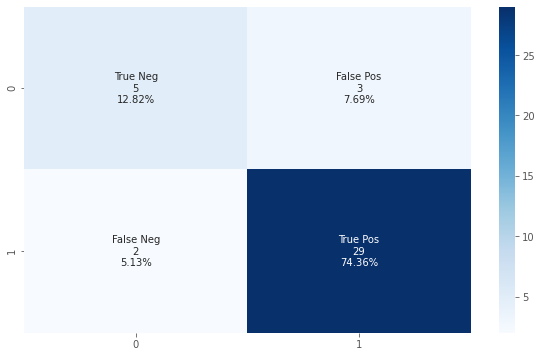

In [150]:
# Plot Confusion Matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [105]:
# Classification Report
target_names = ['class 0', 'class 1']
print(f"Classification Report:\n{classification_report(y_test, test_pred, target_names=target_names)}")

Classification Report:
              precision    recall  f1-score   support

     class 0       0.71      0.62      0.67         8
     class 1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



### Random Forest Model
---

In [54]:
# Instantiate the estimator
RF = RandomForestClassifier()

In [55]:
# Fit the estimator (train the model)
RF.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
# Predict on train 
train_pred2 = RF.predict(X_train)

# Accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_pred2))

# Predict on test
test_pred2 = RF.predict(X_test)

# Accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_pred2))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8974358974358975


In [107]:
# Evaluate the predictions using the appropriate metric
#R-Squared metrics
# Accuarcy
print("R-Squared is:",RF.score(X,y))
print('-'*50)

# Precision
print(f"Precision: {precision_score(y_test, test_pred2)}")
print('-'*50)

# Recall
print(f"Recall: {precision_score(y_test, test_pred2)}")
print('-'*50)

# F1 Score
print(f"F1 Score: {f1_score(y_test, test_pred2)}")

R-Squared is: 0.9794871794871794
--------------------------------------------------
Precision: 0.9354838709677419
--------------------------------------------------
Recall: 0.9354838709677419
--------------------------------------------------
F1 Score: 0.9354838709677419


In [136]:
# Confusion Matrix
cf_matrix2 = confusion_matrix(y_test, test_pred2)
print('Confusion Matrix:\n',cf_matrix2)

Confusion Matrix:
 [[ 6  2]
 [ 2 29]]


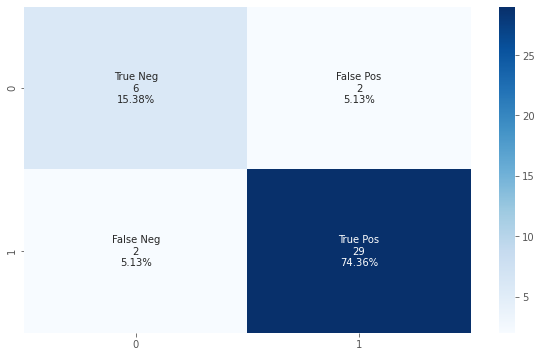

In [149]:
# Plot Confusion Matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues');

In [109]:
# Classification Report
target_names = ['class 0', 'class 1']
print(f"Classification Report:\n{classification_report(y_test, test_pred2, target_names=target_names)}")

Classification Report:
              precision    recall  f1-score   support

     class 0       0.75      0.75      0.75         8
     class 1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39



In [58]:
# Ccompare the predicted and actual values
test_pred2

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [59]:
test_pred2, y_test

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64),
 96     1
 5      1
 116    1
 35     0
 178    1
 185    0
 54     1
 134    1
 90     1
 187    0
 139    1
 142    1
 175    0
 26     1
 89     1
 140    1
 155    1
 23     1
 132    1
 37     1
 151    1
 28     1
 85     1
 93     1
 172    0
 75     1
 18     1
 105    1
 121    1
 130    1
 33     0
 46     0
 166    0
 163    1
 11     1
 164    1
 81     1
 111    1
 67     1
 Name: status, dtype: int64)

In [60]:
# Saving the actual and predicted values to a dataframe
df2 = pd.DataFrame(data=[test_pred2, y_test])

In [61]:
# 0 means Predicted Value and 1 is True Value.
df2.T

,0,1
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,0


In [67]:
# Random forest model gives us an accuracy of 97 percent compared to logistic regression which gave us 87 percent accuracy

## Applying other machine learning models to see if there is improvement in accuracy

### Decision Tree
---

In [69]:
# Instantiate the estimator
DT = DecisionTreeClassifier()

In [70]:
# Fit the estimator (train the model)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
# Predict on train 
train_pred3 = DT.predict(X_train)

# Accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_pred3))

# Predict on test
test_pred3 = DT.predict(X_test)

# Accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_pred3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8974358974358975


In [114]:
# Evaluate the predictions using the appropriate metric
#R-Squared metrics
# Accuarcy
print("R-Squared is:",DT.score(X,y))
print('-'*50)

# Precision
print(f"Precision: {precision_score(y_test, test_pred3)}")
print('-'*50)

# Recall
print(f"Recall: {precision_score(y_test, test_pred3)}")
print('-'*50)

# F1 Score
print(f"F1 Score: {f1_score(y_test, test_pred3)}")

R-Squared is: 0.9794871794871794
--------------------------------------------------
Precision: 0.9354838709677419
--------------------------------------------------
Recall: 0.9354838709677419
--------------------------------------------------
F1 Score: 0.9354838709677419


In [135]:
# Confusion Matrix
cf_matrix3 = confusion_matrix(y_test, test_pred3)
print('Confusion Matrix:\n',cf_matrix3)

Confusion Matrix:
 [[ 6  2]
 [ 2 29]]


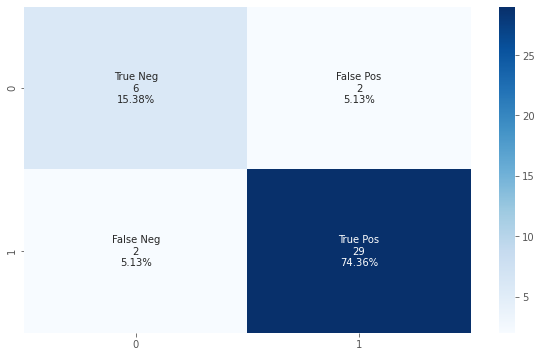

In [148]:
# Plot Confusion Matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix3, annot=labels, fmt='', cmap='Blues');

In [116]:
# Classification Report
target_names = ['class 0', 'class 1']
print(f"Classification Report:\n{classification_report(y_test, test_pred3, target_names=target_names)}")

Classification Report:
              precision    recall  f1-score   support

     class 0       0.75      0.75      0.75         8
     class 1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39



### K-NearestNeighbours Model
---

In [73]:
# Instantiate the estimator
knn = KNeighborsClassifier()

In [74]:
# Fit the estimator (train the model)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
# Predict on train 
train_pred4 = knn.predict(X_train)

# Accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_pred4))

# Predict on test
test_pred4 = knn.predict(X_test)

# Accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_pred4))

Model accuracy on train is:  0.9102564102564102
Model accuracy on test is:  0.8461538461538461


In [118]:
# Evaluate the predictions using the appropriate metric
#R-Squared metrics
# Accuarcy
print("R-Squared is:", knn.score(X,y))
print('-'*50)

# Precision
print(f"Precision: {precision_score(y_test, test_pred4)}")
print('-'*50)

# Recall
print(f"Recall: {precision_score(y_test, test_pred4)}")
print('-'*50)

# F1 Score
print(f"F1 Score: {f1_score(y_test, test_pred4)}")

R-Squared is: 0.8974358974358975
--------------------------------------------------
Precision: 0.8787878787878788
--------------------------------------------------
Recall: 0.8787878787878788
--------------------------------------------------
F1 Score: 0.90625


In [134]:
# Confusion Matrix
cf_matrix4 = confusion_matrix(y_test, test_pred4)
print('Confusion Matrix:\n',cf_matrix4)

Confusion Matrix:
 [[ 4  4]
 [ 2 29]]


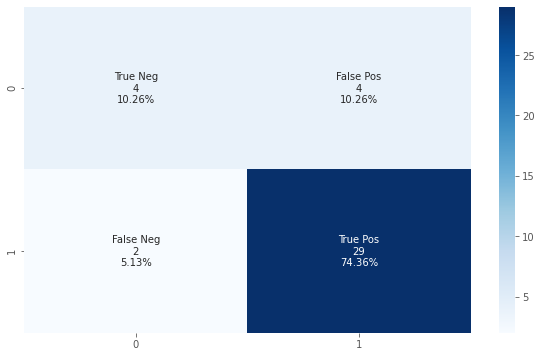

In [146]:
# Plot Confusion Matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix4.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix4.flatten()/np.sum(cf_matrix4)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix4, annot=labels, fmt='', cmap='Blues');

In [120]:
# Classification Report
target_names = ['class 0', 'class 1']
print(f"Classification Report:\n{classification_report(y_test, test_pred4, target_names=target_names)}")

Classification Report:
              precision    recall  f1-score   support

     class 0       0.67      0.50      0.57         8
     class 1       0.88      0.94      0.91        31

    accuracy                           0.85        39
   macro avg       0.77      0.72      0.74        39
weighted avg       0.84      0.85      0.84        39



### SupportVectorMachine Model
---

In [77]:
# Instantiate the estimator
SVM = SVC(kernel='linear')

In [78]:
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [121]:
# Predict on train 
train_pred5 = SVM.predict(X_train)

# Accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_pred5))

# Predict on test
test_pred5 = SVM.predict(X_test)

# Accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_pred5))

Model accuracy on train is:  0.8782051282051282
Model accuracy on test is:  0.8974358974358975


In [122]:
# Evaluate the predictions using the appropriate metric
#R-Squared metrics
# Accuarcy
print("R-Squared is:", SVM.score(X,y))
print('-'*50)

# Precision
print(f"Precision: {precision_score(y_test, test_pred5)}")
print('-'*50)

# Recall
print(f"Recall: {precision_score(y_test, test_pred5)}")
print('-'*50)

# F1 Score
print(f"F1 Score: {f1_score(y_test, test_pred5)}")

R-Squared is: 0.882051282051282
--------------------------------------------------
Precision: 0.9090909090909091
--------------------------------------------------
Recall: 0.9090909090909091
--------------------------------------------------
F1 Score: 0.9374999999999999


In [132]:
# Confusion Matrix
cf_matrix5 = confusion_matrix(y_test, test_pred5)
print('Confusion Matrix:\n',cf_matrix5)

Confusion Matrix:
 [[ 5  3]
 [ 1 30]]


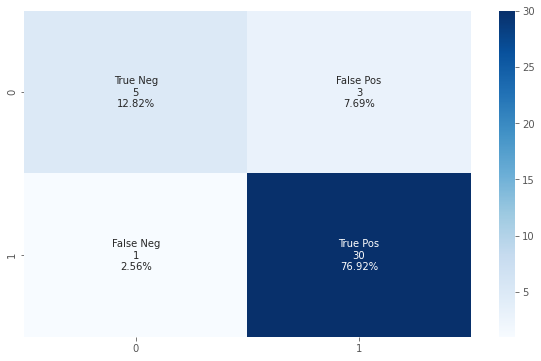

In [147]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix5.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix5.flatten()/np.sum(cf_matrix5)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix5, annot=labels, fmt='', cmap='Blues');

In [125]:
# Classification Report
target_names = ['class 0', 'class 1']
print(f"Classification Report:\n{classification_report(y_test, test_pred5, target_names=target_names)}")

Classification Report:
              precision    recall  f1-score   support

     class 0       0.83      0.62      0.71         8
     class 1       0.91      0.97      0.94        31

    accuracy                           0.90        39
   macro avg       0.87      0.80      0.83        39
weighted avg       0.89      0.90      0.89        39

